<a href="https://colab.research.google.com/github/choi-yh/Pyhon_ML_Guide/blob/master/02%EC%9E%A5/02_06_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0%EC%9C%BC%EB%A1%9C_%EC%88%98%ED%96%89%ED%95%98%EB%8A%94_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* **Passengerid**: 탑승자 데이터 일련번호
* **survived**: 생존 여부. 0 = 사망, 1 = 생존
* **pclass**: 티켓의 선실 등급. 1 = 일등석, 2 = 이등석, 3 = 삼등석
* **sex**: 탑승자 성별
* **name**: 탑승자 이름
* **Age**: 탑승자 나이
* **sibsp**: 같이 탑승한 형제자매 또는 배우자 인원수
* **parch**: 같이 탑승한 부모님 또는 어린이 인원수
* **ticket**: 티켓 번호
* **cabin**: 선실 번호
* **embarked**: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [4]:
titanic_df = pd.read_csv("/gdrive/My Drive/Python/파이썬_머신러닝_완벽_가이드/01장. 파이썬 기반의 머신러닝과 생태계 이해/titanic_train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
print("\n ### 학습 데이터 정보 ### \n")
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


* 891개의 row, 12개의 column
* float64: 2개 (Age, Fare)
* int64: 5개 (PassengerId, Survived, Pclass, SibSp, Parch)
* object: 5개 (pandas에서 object는 string으로 봐도 무방) (Name, Sex, Ticket, Cabin, Embarked)

* Age, Cabin, Embarked에 null 값이 존재


In [8]:
# Null 값 처리
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean()) # Age는 평균 값으로
titanic_df[['Cabin', 'Embarked']] = titanic_df[['Cabin', 'Embarked']].fillna('N') # Cabin과 Embarked는 'N'으로 null 값 처리

print('데이터 세트 Null 값 개수 ', titanic_df.isna().sum().sum())

데이터 세트 Null 값 개수  0


In [9]:
print(' Sex 값 분포: \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포: \n', titanic_df['Cabin'].value_counts())
print('\n Embakred 값 분포: \n', titanic_df['Embarked'].value_counts())

 Sex 값 분포: 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
E101             3
              ... 
B3               1
B73              1
D11              1
A32              1
D6               1
Name: Cabin, Length: 148, dtype: int64

 Embakred 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [11]:
"""
Cabin의 경우 데이터의 정리가 잘 안되어있다.
선실 등급을 나타내는 첫 번째 알파벳이 중요하다고 판단
앞 문자만 추출
"""

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [13]:
"""
승객 유형별 생존 확률 확인
"""

titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

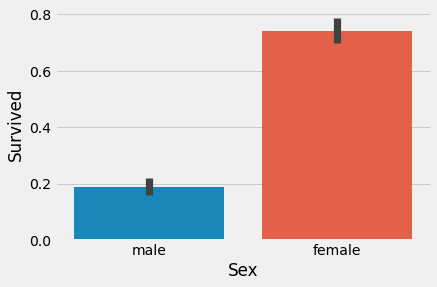

In [14]:
sns.barplot(x='Sex', y='Survived', data=titanic_df);

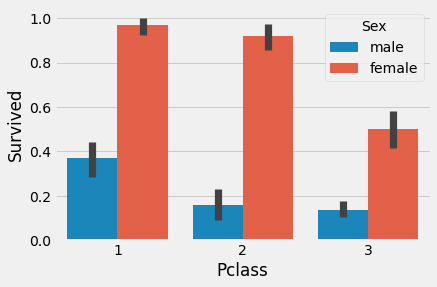

In [15]:
"""
빈부 격차에 따른 생존 확률 => 객실 등급
성별을 함께 고려해 분석
"""

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df);

여성이 생존 확률이 더 높으며, 부자일수록 (객실 등급이 높을수록) 생존 확률이 높은 것을 확인할 수 있다.

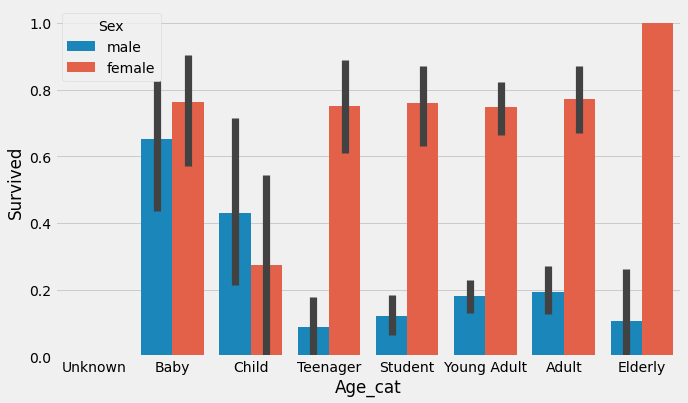

In [16]:
"""
Age에 따른 생존확률
범위별로 분류해 카테고리 값을 할당
0 ~ 5: Baby
6 ~ 12: Child
13 ~ 18: Teenager
19 ~ 25: Student
26 ~ 35: Young Adult
36 ~ 60: Adult
61 ~ : Elderly
-1 이하의 오류 값은 Unknown으로 분류
"""

def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'

    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X 축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환 값으로 지정
# get_category(X)는 입력 값으로 'Age' 컬럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
plt.show()

titanic_df = titanic_df.drop(columns='Age')

* 여성과 Baby의 생존 확률이 높았다.
* 여자 Child의 경우 다른 연령대에 비해 생존 확률이 낮다.

In [19]:
"""
남아있는 문자열 카테고리 피처를 LabelEncoding
"""

from sklearn.preprocessing import LabelEncoder

def encode_feature(df, features):
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    
    return df

features = ['Cabin', 'Sex', 'Embarked', 'Age_cat']
titanic_df = encode_feature(titanic_df, features)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,7,3,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,2,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,7,3,6


In [20]:
# Name 과 Ticket은 삭제
titanic_df = titanic_df.drop(columns=['Name', 'Ticket'])

In [22]:
# 테스트 세트 크기를 전체의 20%로 추출

from sklearn.model_selection import train_test_split

X = titanic_df.drop(columns=['PassengerId', 'Survived'])
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [26]:
# Decision Tree, Random Forest, Logistic Regression 이용

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 각 Estimator 객체 생성
dt = DecisionTreeClassifier(random_state=13)
rf = RandomForestClassifier(random_state=13)
lr = LogisticRegression(random_state=13)

# Decision Tree 학습/예측/평가
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print('DecisionTreeClassifier 정확도: {:.4f}'.format(accuracy_score(y_test, dt_pred)))

# Random Forest 학습/예측/평가
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('RandomForestClassifier 정확도: {:.4f}'.format(accuracy_score(y_test, rf_pred)))

# Logistic Regression 학습/예측/평가
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('LogisticRegression 정확도: {:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7709
RandomForestClassifier 정확도: 0.8324
LogisticRegression 정확도: 0.8268


In [36]:
"""
교차 검증으로 Decision Tree 모델 평가
"""

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행
    for iter_counts, (train_index, test_index) in enumerate(kfold.split(X)):
        # X 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_counts, accuracy))

    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도: {:.4f}'.format(mean_score))

exec_kfold(dt, folds=5)

교차 검증 0 정확도: 0.7486
교차 검증 1 정확도: 0.7360
교차 검증 2 정확도: 0.8371
교차 검증 3 정확도: 0.7809
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7846


In [37]:
"""
cross_val_score 이용
"""

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X, y, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print('평균 정확도: {:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7598
교차 검증 1 정확도: 0.7640
교차 검증 2 정확도: 0.8371
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7935


cross_val_score()와 KFold의 평균 정확도가 약간 다른 이유는 cross_val_score()는 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문이다.

In [38]:
"""
GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터 찾고 예측 성능 측정
max_depth, min_samples_split, min_samples_leaf를 변경
"""

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
              }

grid_cv = GridSearchCV(dt,
                       param_grid=parameters,
                       scoring='accuracy',
                       cv=5)
grid_cv.fit(X_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터: ", grid_cv.best_params_)
print('GridSearchCV 최고 정확도: {:.4f}'.format(grid_cv.best_score_))

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
best_dt = grid_cv.best_estimator_
best_dt_pred = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, best_dt_pred)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7908
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8492


일반적으로 하이퍼 파라미터를 튜닝하더라도 성능이 많이 증가하지는 않는다.  
테스트 데이터 세트가 작기 때문에 수치 상으로 예측 성능이 많이 증가한 것처럼 보인다.